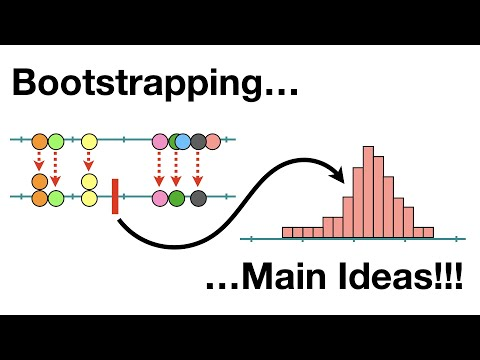

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. Standard error of the mean measures how much the sample mean is likely to differ from the true population mean. It is derived from the standard deviation and the sample size, where a larger sample size and a lower standard deviation will both contribute to a lower standard error of the mean (SEM). It gives insight into the reliability of the sample mean (ie how similar it will likely be to the population mean). The standard deviation measures the dispersion of data points in a data set from the mean. Within 1 standard deviation, approximately 2/3rds of data will be found. Within 2, approx 95% of data will be found. This also means that a larger standard deviation is correlated with a wider spread of data, and smaller std dev with a more close spread of data. 

Chat bot link: https://chatgpt.com/share/66faebd7-e5bc-800f-a98c-99d7fefa4d28
Summary: So far, we've discussed the standard deviation (SD) and the standard error of the mean (SEM). The SD measures how spread out data points are from the mean, showing variability in the dataset. The SEM, calculated by dividing the SD by the square root of the sample size, measures how accurate the sample mean is as an estimate of the population mean. In essence, SD describes data spread, while SEM focuses on the precision of the sample mean in representing the population mean.

2. The standard deviation of the bootstrapped means is essentially the standard error of the mean of the original data set. Then, a formula can be used to calculate the 95% confidence interval which essentially involves taking the bootstrapped sample mean and adding/subtracting the z-score for 95% (1.96) by the standard error of the mean. Then, this range will represent the 95% confidence interval of the sample. 

3. This can be done by first completing bootstrap sampling, then calculating the means for all the bootstrap samples, and sortign the means in asecnding order. In order to create a 95% confidence interval, we then find the values of the mean at the 2.5 percentile and 97.5 percentile. Then, the 95% confidence interval is simply the range between the 2.5  percentile and 97.5 percentile values. 

link: https://chatgpt.com/share/66faf1d3-6a74-800f-ac89-9fc67aa2d133
summary: Here's a summary of our discussion so far:

Using the Standard Error of the Mean (SEM) for Confidence Intervals:

To create a 95% confidence interval, calculate the bootstrapped sample means, find their average, and compute the standard error (the standard deviation of the bootstrapped means). The confidence interval is then:
𝜇boot ± 1.96 ⋅ SEM

This interval should cover about 95% of the bootstrapped means.
Percentile-Based Bootstrapped Confidence Interval:

An alternative method that doesn’t rely on the standard error is to use the sorted bootstrapped means. A 95% confidence interval can be created by taking the 2.5th percentile as the lower bound and the 97.5th percentile as the upper bound.
This method is robust and doesn’t assume normality.
In both cases, the goal is to determine the range that contains 95% of the bootstrapped sample means.

In [10]:
import pandas as pd

# Load the CSV file
file_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-05-07/rolling_stone.csv'
df = pd.read_csv(file_path)
df

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,...,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
0,"Sinatra, Frank",Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,...,2,48.0,spotify:album:3GmwKB1tgPZgXeRJZSm9WX,1.0,Male,1915.0,1946.0,40.000000,9.0,3GmwKB1tgPZgXeRJZSm9WX
1,"Diddley, Bo",Bo Diddley,Bo Diddley / Go Bo Diddley,214.0,216.0,455.0,-241,1955,Rock n' Roll/Rhythm & Blues,Studio,...,201,50.0,spotify:album:1cbtDEwxCjMhglb49OgNBR,1.0,Male,1928.0,1955.0,27.000000,0.0,1cbtDEwxCjMhglb49OgNBR
2,"Presley, Elvis",Elvis Presley,Elvis Presley,55.0,56.0,332.0,-277,1956,Rock n' Roll/Rhythm & Blues,Studio,...,1,58.0,spotify:album:7GXP5OhYyPVLmcVfO9Iqin,1.0,Male,1935.0,1956.0,21.000000,0.0,7GXP5OhYyPVLmcVfO9Iqin
3,"Sinatra, Frank",Frank Sinatra,Songs for Swingin' Lovers!,306.0,308.0,NaN,-195,1956,Big Band/Jazz,Studio,...,2,62.0,spotify:album:4kca7vXd1Wo5GE2DMafvMc,1.0,Male,1915.0,1946.0,41.000000,10.0,4kca7vXd1Wo5GE2DMafvMc
4,Little Richard,Little Richard,Here's Little Richard,50.0,50.0,227.0,-177,1957,NaN,Studio,...,13,64.0,spotify:album:18tV6PLXYvVjsdOVk0S7M8,1.0,Male,1932.0,1957.0,25.000000,0.0,18tV6PLXYvVjsdOVk0S7M8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Beck,Beck,Sea Change,440.0,436.0,NaN,-61,2002,Indie/Alternative Rock,Studio,...,8,51.0,spotify:album:5ieP11rJQvuYz0Ov3k03cy,1.0,Male,1970.0,1993.0,32.000000,9.0,5ieP11rJQvuYz0Ov3k03cy
687,"Cooke, Sam",Sam Cooke,Portrait of a Legend 1951-1964,106.0,107.0,307.0,-201,2003,Soul/Gospel/R&B,Greatest Hits,...,135,55.0,spotify:album:4jiO2jRz7g50ESvYYKsKwZ,1.0,Male,1931.0,1958.0,72.000000,45.0,4jiO2jRz7g50ESvYYKsKwZ
688,White Stripes,The White Stripes,Elephant,390.0,390.0,449.0,-59,2003,Blues/Blues Rock,Studio,...,6,76.0,spotify:album:6D9urpsOWWKtYvF6PaorGE,2.0,Male/Female,3949.0,1999.0,28.500000,4.0,6D9urpsOWWKtYvF6PaorGE
689,"Chao, Manu",Manu Chao,Proxima estacion: Esperanza,NaN,474.0,NaN,-501,2001,Latin,Studio,...,201,73.0,spotify:album:4t1LLdXiWTfoywqricztFo,1.0,Male,1961.0,1998.0,40.000000,3.0,4t1LLdXiWTfoywqricztFo


In [13]:
df_clean = df.dropna()
df_first_ten = df_clean.head(10)
df_first_ten

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,...,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
0,"Sinatra, Frank",Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,...,2,48.0,spotify:album:3GmwKB1tgPZgXeRJZSm9WX,1.0,Male,1915.0,1946.0,40.00,9.0,3GmwKB1tgPZgXeRJZSm9WX
2,"Presley, Elvis",Elvis Presley,Elvis Presley,55.0,56.0,332.0,-277,1956,Rock n' Roll/Rhythm & Blues,Studio,...,1,58.0,spotify:album:7GXP5OhYyPVLmcVfO9Iqin,1.0,Male,1935.0,1956.0,21.00,0.0,7GXP5OhYyPVLmcVfO9Iqin
35,"Charles, Ray",Ray Charles,Modern Sounds in Country and Western Music,104.0,105.0,127.0,-23,1962,Soul/Gospel/R&B,Studio,...,1,55.0,spotify:album:4j4w5DDWMKD7ePStAl19OF,1.0,Male,1930.0,1949.0,32.00,13.0,4j4w5DDWMKD7ePStAl19OF
38,"Brown, James",James Brown,"Live at the Apollo, 1962",24.0,25.0,65.0,-41,1963,Funk/Disco,Live,...,91,28.0,spotify:album:0B6BbyElOe4bwziJrunOTe,1.0,Male,1933.0,1958.0,30.00,5.0,0B6BbyElOe4bwziJrunOTe
42,"Dylan, Bob",Bob Dylan,The Freewheelin' Bob Dylan,97.0,97.0,255.0,-158,1963,Country/Folk/Country Rock/Folk Rock,Studio,...,22,66.0,spotify:album:0o1uFxZ1VTviqvNaYkTJek,1.0,Male,1941.0,1962.0,22.00,1.0,0o1uFxZ1VTviqvNaYkTJek
61,Beatles,The Beatles,A Hard Day's Night,388.0,307.0,263.0,125,1964,Rock n' Roll/Rhythm & Blues,Studio,...,1,73.0,spotify:album:6wCttLq0ADzkPgtRnUihLV,4.0,Male,7765.0,1963.0,22.75,1.0,6wCttLq0ADzkPgtRnUihLV
80,"Dylan, Bob",Bob Dylan,Highway 61 Revisited,4.0,4.0,18.0,-14,1965,Country/Folk/Country Rock/Folk Rock,Studio,...,3,64.0,spotify:album:6YabPKtZAjxwyWbuO9p4ZD,1.0,Male,1941.0,1962.0,24.00,3.0,6YabPKtZAjxwyWbuO9p4ZD
89,"Coltrane, John",John Coltrane,A Love Supreme,47.0,47.0,66.0,-19,1965,Big Band/Jazz,Studio,...,64,47.0,spotify:album:7Eoz7hJvaX1eFkbpQxC5PA,1.0,Male,1926.0,1957.0,39.00,8.0,7Eoz7hJvaX1eFkbpQxC5PA
90,"Redding, Otis",Otis Redding,Otis Blue: Otis Redding Sings Soul,74.0,78.0,178.0,-104,1965,Soul/Gospel/R&B,Studio,...,75,59.0,spotify:album:68BCjMsHX4Gf11BJSkjwGz,1.0,Male,1941.0,1964.0,24.00,1.0,68BCjMsHX4Gf11BJSkjwGz
91,"Dylan, Bob",Bob Dylan,Bringing It All Back Home,31.0,31.0,181.0,-150,1965,Country/Folk/Country Rock/Folk Rock,Studio,...,6,58.0,spotify:album:1lPoRKSgZHQAYXxzBsOQ7v,1.0,Male,1941.0,1962.0,24.00,3.0,1lPoRKSgZHQAYXxzBsOQ7v


In [1]:
# import the required modules 
import pandas as pd
import numpy as np

# Load the CSV file
file_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-05-07/rolling_stone.csv'
df = pd.read_csv(file_path)

# Crop to the first ten rows, just for this sample data set because it is so large!
df_first_ten = df.head(10)

# Perform bootstrapping
num_iterations = 10  # Number of bootstrap samples
bootstrap_samples = [] # we start with an empty list because no samples have been bootstrapped yet

# Bootstrap sampling
for _ in range(num_iterations): # a for loop to complete the required number of iterations
    # the frac=1 means we sample 100% of the data, so all 10 rows
    # replace=True allows sampling with replacement so values can be picked multiple times 
    sample = df_first_ten['rank_2003'].sample(frac=1, replace=True)
    # for each sample, we compute the mean and add it to the list sample.mean
    bootstrap_samples.append(sample.mean())  # Calculate the mean of each sample
    # at the end, there will be 10 samples in bootstrap_samples
    
    
# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_samples, 2.5)  # calculating the 2.5 percentile
upper_bound = np.percentile(bootstrap_samples, 97.5)  # calculating the 97.5 percentile

# Display the confidence interval
print(f"95% Confidence Interval for rank_2003: ({lower_bound}, {upper_bound})")


95% Confidence Interval for rank_2003: (59.145833333333336, 279.875)


4. To calculate it for the median instead, the code can be modified by calculating the median instead of the mean (use code sample.median() instead of sample.mean()).


Question 4 chatbot link: https://chatgpt.com/share/66fdab62-54dc-800f-a151-2a183ab0a38a
Summary: Sample Dataset: You requested a small dataset to practice bootstrapping. I provided a 10-row dataset of heights and saved it as a CSV. You then downloaded the file and asked for code to import it.

File Import Issue: You encountered a UnicodeError due to improper file paths. I explained how to use raw strings, forward slashes, or double backslashes to fix that error. You then faced a FileNotFoundError and were guided to ensure the file name and path were correct, including the file extension .csv.

Cropping Data: You asked for code to crop the dataset to the first 10 rows. I provided the pandas .head(10) method to achieve that.

Removing Null Data: You requested a method to remove rows with null data. I showed how to use dropna() to clean the DataFrame by removing any rows containing missing values.

Bootstrapping Confidence Interval: You wanted to calculate the 95% confidence interval for the rank_2003 column. I provided code for bootstrapping:

Bootstrapping samples were created by resampling the rank_2003 column 10 times with replacement.
The mean of each sample was stored, and the 95% confidence interval was calculated by taking the 2.5th and 97.5th percentiles of the bootstrap distribution.
Detailed Explanation: I explained the bootstrapping process in depth, breaking down the code step by step, explaining how bootstrapping works, and how confidence intervals are calculated.

5. The population parameter describes the entire population, while sample statistic is just taken from a portion of the population. The confidence interval is developed from the sample, and essentially describes the minimum and maximum values for mean/median, that the population parameter has a 95% chance of falling into. There can never be 100% certainty unless the entire population is tested, but it gives enough confidence that certain conclusions can be drawn from the range of values presented. 

6. 1. Bootstrapping is a resampling method often used when we only have a small sample of data, and we're not sure if it represents the whole population very well. We can almost never measure the entire population for any type of study, so it can become difficult to tell how confident we are that our data (often only a small portion of the population) is representative of the population we are measuring. Then, bootstrapping comes in handy! It can be used to understand the variability of the statistic we're looking at, which can be the mean, median, or something else. You only need a small sample to start. Essentially, we take the original sample of data, and randomly draw values from it with replacement, meaning the same value can be picked twice. Also, we want to draw the same number of values that the original sample had, so if I had a list of 10 people's ages, then I'd draw 10 random ages from that data set, with repetitions allowed. This new data set made up of random values from the original data set is called the bootstrapped data set. I'd calculate the new, bootstrapped data set's mean, median, or some other statistic. Then, I'd repeat this process the same number of times as the number of samples I have and end up with 10 new bootstrapped data sets and their corresponding means/medians. Based on how much these values vary, I'd be able to determine my confidence in the data. This is often done online (not by hand!) so it can be done quickly!

B. If I only have a small sample of data of a large population, then I won't be too sure how confident I am in my data. Bootstrapping is mainly used for calculating confidence intervals from the means/medians/other, when it is otherwise difficult. Generally it is used to gauge the distribution of a statistic (such as the mean/median) of a data set, allowing for determination of the uncertainty from the data we have collected. 

C. In this case we would take our data from our sample, and draw n new samples, with replacement. So I might end up drawing the same value twice, or three times, or even n times, but that would still be one of my bootstrapped data sets. Then, I'd calculate the average of that data set, add that value to my bootstrapped data averages list (which is empty at the start), and perform this the same number of times as my number of samples in the original dataset. By the end, I'd have n values in my bootstrapped data averages list, and I'd calculate values of the 2.5 percentile and 97.5 percentile of my bootstrapped data averages list. The 2.5 percentile value is the one that is larger than 2.5% of values in the data set, while the 97.5 percentile value is larger than 97.5% of values in the data set. Then the 2.5 percentile value would be a relatively small number and would be my lower bound, and the 97.5 percentile value would be a larger number, and would be my upper bound for my 95% confidence interval. If my hypothesized mean fell well between those two values, I'd say it was a good guess of the population average. If not, then it wouldn't be very plausible.

7. The confidence interval is used to determine our confidence that the mean/median/other statistic would actually fall within that range. So we often use the 95% confidence interval and determine a range, which means that we are 95% sure that the population's mean/median/statistic would fall within that range, based on the sample size and data we have collected. Because in the video, the confidence interval selected included 0, it means that within our confidence range, 0 is a possiblility, so we are not confident that the drug has a positive benefit for everyone on average. In other words, our calculated mean represented the sample, but our confidence interval represents the actual population, which is why there is such a significant uncertainty. And what we care about is its effect on the population, not on the sample, which is why we must accept the null hypothesis. It might have no effect (on average) on the population. 

summary: Confidence Intervals: These help estimate the range within which the true population parameter (like a mean or proportion) lies, based on a sample statistic. Distinguishing between the two is crucial because the sample statistic is just an estimate of the unknown population value.

Bootstrapping:

It's a resampling method that involves repeatedly sampling from your data with replacement to estimate the distribution of a statistic.
You can calculate various statistics like the mean, median, percentiles, standard deviation, etc., for each bootstrap sample.
This method helps understand the uncertainty or variability of a statistic by generating many possible outcomes from your sample data.
You’re not limited to just the average—you can use bootstrapping for any statistic you're interested in.
In essence, bootstrapping is a powerful tool for making estimates and gauging the reliability of your data without needing to know anything about the underlying population distribution.

link: https://chatgpt.com/share/66fdca07-7efc-800f-89ab-fafd2b280f0d

8. In this analysis, we have been given data about a new vaccine that aims to improve the health of people that take it. We want to determine whether or not the vaccine is effective. We have been given a data set containing information on 10 patients, regarding the patient's age, gender, initial health score, and final health score. We want to determine our confidence that the vaccine has a positive effect, and thus, our null hypothesis will be that the vaccine has no effect on patients. Our alternate hypothesis will be that the vaccine has a positive effect. For this assignment, we want to be 95% confident that the vaccine is beneficial, and thus, we will use the 95% confidence interval.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aaliyahpirani/STA130_HW_F24/refs/heads/main/patient_health_data.csv')
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


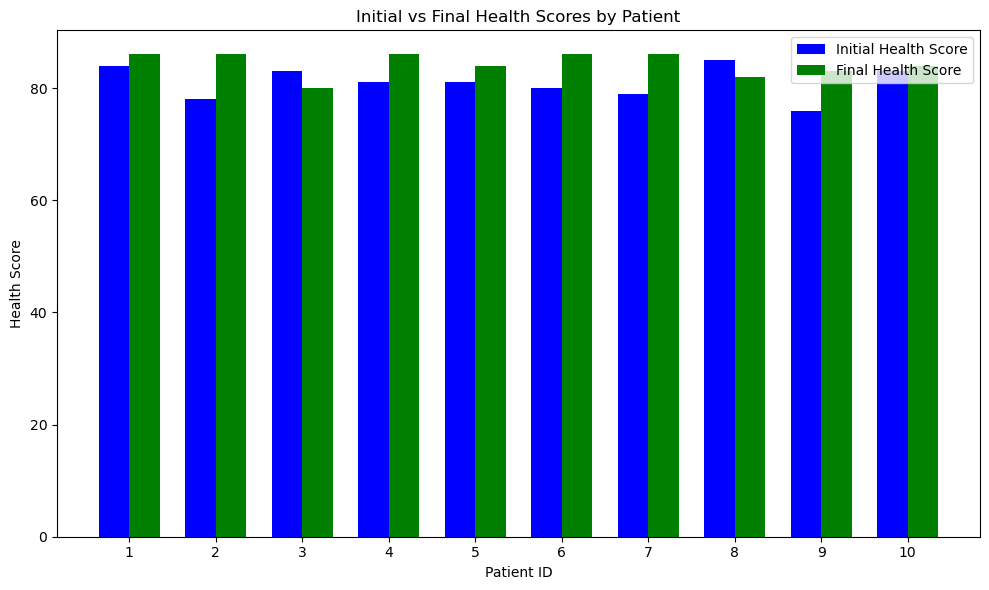

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file from the provided raw GitHub link
url = "https://raw.githubusercontent.com/aaliyahpirani/STA130_HW_F24/main/patient_health_data.csv"
df = pd.read_csv(url)

# Create a bar graph for Initial and Final Health Scores by PatientID
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df))

# Bar positions
bar1 = plt.bar(index, df['InitialHealthScore'], bar_width, label='Initial Health Score', color='b')
bar2 = plt.bar([i + bar_width for i in index], df['FinalHealthScore'], bar_width, label='Final Health Score', color='g')

# Adding labels and title
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs Final Health Scores by Patient')
plt.xticks([i + bar_width / 2 for i in index], df['PatientID'])
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()

Above are the initial and final health scores by patient. This is valuable, as we want to determine whether there is actually a significant difference in the scores before and after. Visualization helps us see the magnitude of this difference.

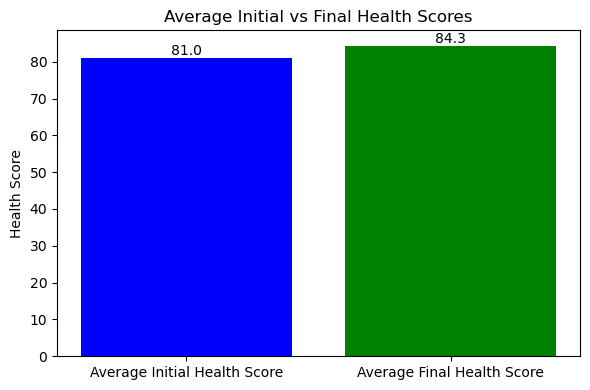

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file from the provided raw GitHub link
url = "https://raw.githubusercontent.com/aaliyahpirani/STA130_HW_F24/main/patient_health_data.csv"
df = pd.read_csv(url)

# Calculate the average Initial and Final Health Scores
average_initial_score = df['InitialHealthScore'].mean()
average_final_score = df['FinalHealthScore'].mean()

# Create a bar graph for average Initial and Final Health Scores
plt.figure(figsize=(6, 4))

# Bar positions and values
scores = [average_initial_score, average_final_score]
labels = ['Average Initial Health Score', 'Average Final Health Score']
colors = ['blue', 'green']

# Create the bar graph
bars = plt.bar(labels, scores, color=colors)

# Adding labels and title
plt.ylabel('Health Score')
plt.title('Average Initial vs Final Health Scores')

# Adding the mean values as labels above the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Display the graph
plt.tight_layout()
plt.show()


This graph shows better the overall trend across all the patients. It also shows the means for the initial health score and final health score. We can tell that there is an overall improvement in the sample size, but are unsure how this would apply to the full population. So, we can use bootstrapping to determine our confidence in this data. 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file from the provided raw GitHub link
url = "https://raw.githubusercontent.com/aaliyahpirani/STA130_HW_F24/main/patient_health_data.csv"
df = pd.read_csv(url)

# Calculate the differences between Initial and Final Health Scores to figure out what the benefit is
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Function to perform bootstrap
def bootstrap(data, num_iterations=10, seed=42): # performing 10 iterations total, and using a seed so it is reproducable
    np.random.seed(seed)  # Set random seed for reproducibility
    means = [] # start with an empty list
    for _ in range(num_iterations): # repeat for each number up to 10
        sample = np.random.choice(data, size=len(data), replace=True)  # bootstrap sample, with repetitions
        means.append(np.mean(sample))  # Calculate mean of the sample, add this to the means list
    return means # end with the list

# Perform bootstrap for the differences
bootstrap_diff_means = bootstrap(df['ScoreDifference'])



The calculation of the score was the final health score - the initial, which means a positive value suggests that overall, people's health was increasing. Using the bootstrapped data, we can make inferences about the population parameters. Since the mean is around 3.2, we can infer that in the population, the health with the vaccine is also around 3.2 points higher than without the vaccine. However, we want to be 95% confident, so we will have to calculate a 95% confidence interval. 

In [22]:
# Calculate the 95% confidence intervals for the differences
def confidence_interval(bootstrap_means, confidence_level=0.95):
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (confidence_level + (1 - confidence_level) / 2) * 100)
    return lower_bound, upper_bound

# Calculate confidence intervals for the difference
diff_ci = confidence_interval(bootstrap_diff_means)

# Display the results
print(f"Mean Difference in Health Scores CI (95%): {diff_ci}")


Mean Difference in Health Scores CI (95%): (0.7, 5.5)


Here, the bounds for the 95% confidence interval are 0.7 and 5.5. Since they are both positive values, we can infer that in the population, the vaccine had a positive health effect. We can be 95% certain that the actual mean in the population will fall between these two values, and that also means we reject the null hypothesis that the vaccine doesn't do anything, and accept the alternative hypothesis, that the vaccine has, on average, a beneficial effect to those it is administered to. Further considerations in this experiment may include taking into account a patients age/sex, as these may also have an impact on the effectiveness of this vaccine. 